# Model training for supervised learning

The goal is to predict the subclass type with a multiclass supervised training algorithm. </br>
The subclasses are: `Basal, Normal, LumA, LumB, Her2`

### Importing general libraries

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [228]:
print(os.getcwd())

c:\Users\ntama\Documentos\Data Science\My Projects\breast-cancer-gene-test\notebooks


### Importing datasets

In [229]:
X_train_pc = pd.read_csv("../processed/X_train_pc.csv", index_col=0)
X_val_pc = pd.read_csv("../processed/X_val_pc.csv", index_col=0)
X_test_pc = pd.read_csv("../processed/X_test_pc.csv", index_col=0)

y_train = pd.read_csv("../processed/y_train.csv", index_col=0)
y_val = pd.read_csv("../processed/y_val.csv", index_col=0)
y_test = pd.read_csv("../processed/y_test.csv",index_col=0)

print(f"Shapes: X_train: {X_train_pc.shape}, X_val: {X_val_pc.shape}, X_test_pc: {X_test_pc.shape}")
print(f"Shapes: y_train: {y_train.shape}, y_val: {y_val.shape}, X_test_pc: {y_test.shape}")

Shapes: X_train: (2386, 50), X_val: (511, 50), X_test_pc: (512, 50)
Shapes: y_train: (2386, 1), y_val: (511, 1), X_test_pc: (512, 1)


In [230]:
print(y_train.value_counts())

pam50 subtype
LumA             1196
LumB              537
Basal             252
Her2              244
Normal            157
Name: count, dtype: int64


In [231]:
weights = []
for cl in range(len(y_train.value_counts())):
    weight = int(round(1 / (y_train.value_counts().iloc[cl] / len(y_train)),0))
    weights.append(weight)

print(f"Weights for each class: LumA, LumB, Basal, Her2, Normal. Respectively: {weights}")

Weights for each class: LumA, LumB, Basal, Her2, Normal. Respectively: [2, 4, 9, 10, 15]


### 01 - Decision Tree classifier 

In [232]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf1 = DecisionTreeClassifier(
    criterion="gini",
    splitter='best',       
    max_depth=None,        
    min_samples_split=2,     
    min_samples_leaf=1,     
    max_features=None,       
    random_state=42,
    class_weight={'LumA': 2, 'LumB': 4, 'Basal': 9, 'Her2': 10, 'Normal': 15}
)

# training the model
clf1.fit(X_train_pc, y_train)

# Metrics
y_pred_clf1 = clf1.predict(X_val_pc)
print(classification_report(y_val, y_pred_clf1))
print(confusion_matrix(y_val, y_pred_clf1))

              precision    recall  f1-score   support

       Basal       0.70      0.85      0.77        54
        Her2       0.60      0.58      0.59        52
        LumA       0.79      0.83      0.81       256
        LumB       0.71      0.58      0.64       115
      Normal       0.42      0.38      0.40        34

    accuracy                           0.72       511
   macro avg       0.64      0.65      0.64       511
weighted avg       0.72      0.72      0.72       511

[[ 46   2   2   4   0]
 [  7  30   8   5   2]
 [  4   6 213  17  16]
 [  6  12  30  67   0]
 [  3   0  16   2  13]]


#### 01.1 - Hyperparameter tuning

Computationally expensive. After running once, this was the output: Best params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best score: 0.6208905679984736

In [233]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "max_depth": [5,6,7,8,9,10, None],
#     "min_samples_split": range(10),
#     "min_samples_leaf": range(10),
#     "criterion": ["gini", "entropy"],
#     "class_weight": [None, "balanced"]
# }

# grid = GridSearchCV(
#     DecisionTreeClassifier(random_state=42),
#     param_grid,
#     cv=5,
#     scoring="f1_macro"
# )

# grid.fit(X_train_pc, y_train)
# print("Best params:", grid.best_params_)
# print("Best score:", grid.best_score_)

In [234]:
clf2 = DecisionTreeClassifier(
    criterion="gini",
    splitter='best',       
    max_depth=7,        
    min_samples_split=2,     
    min_samples_leaf=3,     
    max_features=None,       
    random_state=42,
    class_weight=None
)

clf2.fit(X_train_pc, y_train)

y_pred_clf2 = clf2.predict(X_val_pc)
print(classification_report(y_val, y_pred_clf2))
print(confusion_matrix(y_val, y_pred_clf2))

              precision    recall  f1-score   support

       Basal       0.87      0.83      0.85        54
        Her2       0.58      0.63      0.61        52
        LumA       0.82      0.86      0.84       256
        LumB       0.65      0.59      0.62       115
      Normal       0.54      0.44      0.48        34

    accuracy                           0.75       511
   macro avg       0.69      0.67      0.68       511
weighted avg       0.74      0.75      0.74       511

[[ 45   4   1   4   0]
 [  4  33   3  11   1]
 [  1   4 221  19  11]
 [  1  16  29  68   1]
 [  1   0  16   2  15]]


`Notes on metrics from Decision Tree:` 
- The model predicts the classes LumA and Basal, which are the most represented ones.
- It gets confused with Her2, LumB and Normal classes. (Less represented classes)

### 02 - Random Forest Classifier

In [235]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

rf1 = RandomForestClassifier()
rf_params = rf1.get_params()
rf1.fit(X_train_pc, y_train)
y_pred_rf1 = rf1.predict(X_val_pc)

print(classification_report(y_val, y_pred_rf1))
print(confusion_matrix(y_val, y_pred_rf1))

C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

       Basal       0.86      0.93      0.89        54
        Her2       0.95      0.69      0.80        52
        LumA       0.81      0.94      0.87       256
        LumB       0.79      0.74      0.77       115
      Normal       0.92      0.32      0.48        34

    accuracy                           0.83       511
   macro avg       0.87      0.72      0.76       511
weighted avg       0.84      0.83      0.82       511

[[ 50   1   1   2   0]
 [  3  36   4   9   0]
 [  3   1 241  10   1]
 [  1   0  29  85   0]
 [  1   0  21   1  11]]


We will explore tuning the random forest classifier model by testing the performance over a range of max_depth values. Fit a random forest classifier for max_depth values from 1-25. Save the accuracy score for the train and test sets in the lists accuracy_train, accuracy_test.

In [236]:
from sklearn.metrics import f1_score

f1_train = []
f1_val = []
depths = range(1,26)
for i in depths:
    rfi = RandomForestClassifier(max_depth = i)
    rfi.fit(X_train_pc, y_train)

    y_train_pred = rfi.predict(X_train_pc)
    y_val_pred = rfi.predict(X_val_pc)
    
    f1_train.append(f1_score(y_train_pred, y_train, average='macro'))
    f1_val.append(f1_score(y_val_pred, y_val, average='macro'))

C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

Find the largest accuracy and the depth this occurs on the test data.

In [237]:
max_f1 = np.max(f1_val)
best_depth = np.argmax(f1_val)
print(f"Maximum f1_score testing from 25 different trees: {round(max_f1,4)}")
print(f"Best depth achieved: {best_depth}-depth")

Maximum f1_score testing from 25 different trees: 0.7745
Best depth achieved: 13-depth


There isn't a visible increment in f1_score compared to the base model without hyperparameters
##### Balancing classes and choosing the max_depth = best_depth

In [238]:
best_rf1 = RandomForestClassifier(
                                    max_depth=best_depth,
                                    class_weight='balanced',
                                    min_samples_leaf=4,
                                    random_state=42)

best_rf1.fit(X_train_pc, y_train)
y_pred_best_rf1 = best_rf1.predict(X_val_pc)

print(classification_report(y_val, y_pred_best_rf1))
print(confusion_matrix(y_val, y_pred_best_rf1))

C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

       Basal       0.91      0.94      0.93        54
        Her2       0.80      0.77      0.78        52
        LumA       0.86      0.90      0.88       256
        LumB       0.75      0.76      0.75       115
      Normal       0.75      0.44      0.56        34

    accuracy                           0.83       511
   macro avg       0.81      0.76      0.78       511
weighted avg       0.82      0.83      0.82       511

[[ 51   0   0   3   0]
 [  1  40   4   7   0]
 [  2   2 230  17   5]
 [  1   6  21  87   0]
 [  1   2  14   2  15]]


`The model still struggles to predict the class Normal with a good f1_score`

#### 02.1 Tuning the RandomForestClassifier
Output: Best params: {'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 1}
Best score: 0.7510850066809764

In [239]:
from sklearn.model_selection import StratifiedKFold

# rf_tune = RandomForestClassifier(random_state=42)

# param_grid = {
#     "min_samples_leaf": [1, 2, 5, 10, 20, 50],
#     "class_weight": [None, 'balanced'],
#     "max_depth": range(25)
# }

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# grid = GridSearchCV(rf_tune, param_grid, cv=cv, scoring="f1_macro")
# grid.fit(X_train_pc, y_train)

# print("Best params:", grid.best_params_)
# print("Best score:", grid.best_score_)

In [240]:
best_rf2 = RandomForestClassifier(
                                    max_depth=3,
                                    class_weight='balanced',
                                    min_samples_leaf=1,
                                    random_state=42)

best_rf2.fit(X_train_pc, y_train)
y_pred_val_rf2 = best_rf2.predict(X_val_pc)

print(classification_report(y_val, y_pred_val_rf2))
print(confusion_matrix(y_val, y_pred_val_rf2))

C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

       Basal       0.81      0.93      0.86        54
        Her2       0.66      0.79      0.72        52
        LumA       0.90      0.74      0.81       256
        LumB       0.75      0.72      0.74       115
      Normal       0.38      0.74      0.50        34

    accuracy                           0.76       511
   macro avg       0.70      0.78      0.73       511
weighted avg       0.80      0.76      0.77       511

[[ 50   3   0   0   1]
 [  4  41   2   4   1]
 [  4   5 189  21  37]
 [  3  12  15  83   2]
 [  1   1   5   2  25]]


In [241]:
from sklearn.metrics import accuracy_score
#accuracy for train set
y_pred_train_rf2 = best_rf2.predict(X_train_pc)
print(f"f1_macro for train set with XGB Classifier: {f1_score(y_train, y_pred_train_rf2, average="macro")}")
print(f"f1_macro for val set with XGB Classifier: {f1_score(y_val, y_pred_val_rf2, average="macro")})")
gap_f1_rf2 = round((f1_score(y_train, y_pred_train_rf2, average="macro")) - (f1_score(y_val, y_pred_val_rf2, average="macro")),4)
print(f"There is a gap of {gap_f1_rf2}")


print(f"Accuracy for train set with XGB Classifier: {accuracy_score(y_train, y_pred_train_rf2)}")
print(f"Accuracy for val set with XGB Classifier: {accuracy_score(y_val, y_pred_val_rf2)}")
gap_accuracy_rf2 = round((accuracy_score(y_train, y_pred_train_rf2)) - (accuracy_score(y_val, y_pred_val_rf2)),4)
print(f"There is a gap of {gap_accuracy_rf2}")

f1_macro for train set with XGB Classifier: 0.7182305503376528
f1_macro for val set with XGB Classifier: 0.725713366090162)
There is a gap of -0.0075
Accuracy for train set with XGB Classifier: 0.7393126571668064
Accuracy for val set with XGB Classifier: 0.7592954990215264
There is a gap of -0.02


### 02.2 - Using AdaBoost with the Random Forest Classifier previously tuned

In [242]:
from sklearn.ensemble import AdaBoostClassifier

# decision_stump = RandomForestClassifier(max_depth=7,
#                                     class_weight='balanced',
#                                     min_samples_leaf=1,
#                                     random_state=42)

# print(decision_stump.get_params())

### 03 - XGBoost Classifier

In [243]:
#Classes from strings to numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)

print(le.classes_)

['Basal' 'Her2' 'LumA' 'LumB' 'Normal']


C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [244]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

weights = compute_sample_weight(class_weight="balanced", y=y_train_enc)


xgb = XGBClassifier(
    objective="multi:softmax",  # for multiclass
    num_class=5, 
    n_estimators=500,
    sample_weight=weights,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.6,
    colsample_bytree=0.7,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss",
    #early_stopping_rounds=20,
    min_child_weight=5,
    min_split_loss=1,
    reg_alpha=1,
    reg_lambda=10
)

#Training the model
xgb.fit(
    X_train_pc, y_train_enc,
    eval_set=[(X_train_pc, y_train_enc), (X_val_pc, y_val_enc)],
)

# Predictions
y_val_pred_xgb = xgb.predict(X_val_pc)

#Metrics
f1 = f1_score(y_val_enc, y_val_pred_xgb, average="macro")
print(f"Validation Macro F1: {round(f1, 4)}")

[0]	validation_0-mlogloss:1.60114	validation_1-mlogloss:1.60137
[1]	validation_0-mlogloss:1.59073	validation_1-mlogloss:1.59096
[2]	validation_0-mlogloss:1.57993	validation_1-mlogloss:1.58034
[3]	validation_0-mlogloss:1.56914	validation_1-mlogloss:1.56974
[4]	validation_0-mlogloss:1.55928	validation_1-mlogloss:1.55988
[5]	validation_0-mlogloss:1.54924	validation_1-mlogloss:1.54989
[6]	validation_0-mlogloss:1.53953	validation_1-mlogloss:1.54022
[7]	validation_0-mlogloss:1.52930	validation_1-mlogloss:1.52991
[8]	validation_0-mlogloss:1.51940	validation_1-mlogloss:1.52003
[9]	validation_0-mlogloss:1.51043	validation_1-mlogloss:1.51074
[10]	validation_0-mlogloss:1.50139	validation_1-mlogloss:1.50165
[11]	validation_0-mlogloss:1.49358	validation_1-mlogloss:1.49402
[12]	validation_0-mlogloss:1.48454	validation_1-mlogloss:1.48481
[13]	validation_0-mlogloss:1.47536	validation_1-mlogloss:1.47546
[14]	validation_0-mlogloss:1.46652	validation_1-mlogloss:1.46666
[15]	validation_0-mlogloss:1.45785	

C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:08:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "sample_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[39]	validation_0-mlogloss:1.28557	validation_1-mlogloss:1.28652
[40]	validation_0-mlogloss:1.27898	validation_1-mlogloss:1.27995
[41]	validation_0-mlogloss:1.27407	validation_1-mlogloss:1.27521
[42]	validation_0-mlogloss:1.26880	validation_1-mlogloss:1.26982
[43]	validation_0-mlogloss:1.26386	validation_1-mlogloss:1.26500
[44]	validation_0-mlogloss:1.25857	validation_1-mlogloss:1.25991
[45]	validation_0-mlogloss:1.25237	validation_1-mlogloss:1.25377
[46]	validation_0-mlogloss:1.24651	validation_1-mlogloss:1.24792
[47]	validation_0-mlogloss:1.24073	validation_1-mlogloss:1.24218
[48]	validation_0-mlogloss:1.23507	validation_1-mlogloss:1.23652
[49]	validation_0-mlogloss:1.22973	validation_1-mlogloss:1.23110
[50]	validation_0-mlogloss:1.22540	validation_1-mlogloss:1.22684
[51]	validation_0-mlogloss:1.22046	validation_1-mlogloss:1.22203
[52]	validation_0-mlogloss:1.21477	validation_1-mlogloss:1.21635
[53]	validation_0-mlogloss:1.20912	validation_1-mlogloss:1.21081
[54]	validation_0-mloglos

In [245]:
print(classification_report(y_val_enc, y_val_pred_xgb))
print(confusion_matrix(y_val_enc, y_val_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.88      0.73      0.80        52
           2       0.82      0.95      0.88       256
           3       0.78      0.71      0.75       115
           4       0.77      0.29      0.43        34

    accuracy                           0.83       511
   macro avg       0.84      0.73      0.76       511
weighted avg       0.83      0.83      0.82       511

[[ 52   1   0   1   0]
 [  1  38   3  10   0]
 [  0   0 243  10   3]
 [  0   3  30  82   0]
 [  1   1  20   2  10]]


Results from GridSearchCV (commented out due to computational cost):</br> 
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.8}
Best Macro F1: 0.7783555091320759

In [246]:
# param_grid_xgb = {
#     "n_estimators": [200, 300, 500],
#     "max_depth": [6, 7, 8],
#     "learning_rate": [0.01, 0.1, 0.2, 0.5],
#     "subsample": [0.8, 1.0],
#     "colsample_bytree": [0.8, 1.0]
# }

# xgb_grid = XGBClassifier(
#     objective="multi:softmax",  # for multiclass
#     num_class=5,
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric="mlogloss"
# )

# grid_xgb = GridSearchCV(
#     estimator=xgb_grid,
#     param_grid=param_grid_xgb,
#     scoring="f1_macro",
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# grid_xgb.fit(X_train_pc, y_train_enc)
# print("Best Params:", grid_xgb.best_params_)
# print("Best Macro F1:", grid_xgb.best_score_)

### Oversampling with SMOTE for better prediction of the least represented class

Instead of having a perfect balance, a sampling strategy will be used in order to reduce noisy data

In [254]:
y_train.value_counts()

pam50 subtype
LumA             1196
LumB              537
Basal             252
Her2              244
Normal            157
Name: count, dtype: int64

In [253]:
y_train_enc_df = pd.DataFrame(y_train_enc)
print(y_train_enc_df.value_counts())

0
2    1196
3     537
0     252
1     244
4     157
Name: count, dtype: int64


In [284]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42, sampling_strategy={0: 600, 1: 600, 2: 1196, 3: 600, 4: 500})
X_train_res, y_train_res = smote.fit_resample(X_train_pc, y_train_enc)

#### Training XGBClassifier with both resampled sets

In [294]:
xgb_smoted = XGBClassifier(
    objective="multi:softmax",  # for multiclass
    num_class=5, 
    n_estimators=500,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.6,
    colsample_bytree=0.7,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss",
    #early_stopping_rounds=20,
    min_child_weight=5,
    min_split_loss=1,
    reg_alpha=4,
    reg_lambda=20
)

#Training the model
xgb_smoted.fit(X_train_res, y_train_res)

# Predictions
y_val_pred_xgb_smoted = xgb_smoted.predict(X_val_pc)

#Metrics
f1_smoted = f1_score(y_val_enc, y_val_pred_xgb_smoted, average="macro")
print(f"Validation Macro F1: {round(f1_smoted, 4)}")

C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:34:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Macro F1: 0.7727


In [295]:
print(classification_report(y_val_enc, y_val_pred_xgb_smoted))
print(confusion_matrix(y_val_enc, y_val_pred_xgb_smoted))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        54
           1       0.72      0.79      0.75        52
           2       0.86      0.90      0.88       256
           3       0.77      0.65      0.71       115
           4       0.66      0.56      0.60        34

    accuracy                           0.82       511
   macro avg       0.78      0.77      0.77       511
weighted avg       0.81      0.82      0.81       511

[[ 52   0   0   1   1]
 [  2  41   1   7   1]
 [  2   2 231  13   8]
 [  2  12  26  75   0]
 [  1   2  11   1  19]]


### Testing overfitting for XGB_smoted

In [296]:
from sklearn.metrics import accuracy_score
#accuracy for train set
y_pred_train_xgb_smoted = xgb_smoted.predict(X_train_res)
print(f"f1_macro for train set with XGB Classifier with Smote: {f1_score(y_train_res, y_pred_train_xgb_smoted, average="macro")}")
print(f"f1_macro for val set with XGB Classifier Smoted: {f1_score(y_val_enc, y_val_pred_xgb_smoted, average="macro")})")
gap_f1_smoted = round((f1_score(y_train_res, y_pred_train_xgb_smoted, average="macro")) - (f1_score(y_val_enc, y_val_pred_xgb_smoted, average="macro")),4)
print(f"There is a gap of {gap_f1_smoted}")


print(f"Accuracy for train set with XGB Classifier Smoted: {accuracy_score(y_train_res, y_pred_train_xgb_smoted)}")
print(f"Accuracy for val set with XGB Classifier Smoted: {accuracy_score(y_val_enc, y_val_pred_xgb_smoted)}")
gap_accuracy_smoted = round((accuracy_score(y_train_res, y_pred_train_xgb_smoted)) - (accuracy_score(y_val_enc, y_val_pred_xgb_smoted)),4)
print(f"There is a gap of {gap_accuracy_smoted}")

f1_macro for train set with XGB Classifier with Smote: 0.8456489269608273
f1_macro for val set with XGB Classifier Smoted: 0.772673866653692)
There is a gap of 0.073
Accuracy for train set with XGB Classifier Smoted: 0.8489702517162472
Accuracy for val set with XGB Classifier Smoted: 0.8180039138943248
There is a gap of 0.031


`Note:` Since the gaps are not too significant, the model is generalizing well

### Testing variance with cross-val score

In [297]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_smoted, X_train_res, y_train_res, cv=cv, scoring="f1_macro")

print("CV F1 Macro:", scores)
print("Mean:", np.mean(scores), "Std:", np.std(scores))

C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:35:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:35:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:35:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } 

CV F1 Macro: [0.7744854  0.78260365 0.81103544 0.80921633 0.80906399]
Mean: 0.7972809610739157 Std: 0.015527649693067826


### Learning curves

[learning_curve] Training set sizes: [ 40  81 122 163 204 244 285 326 367 408]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.4s finished


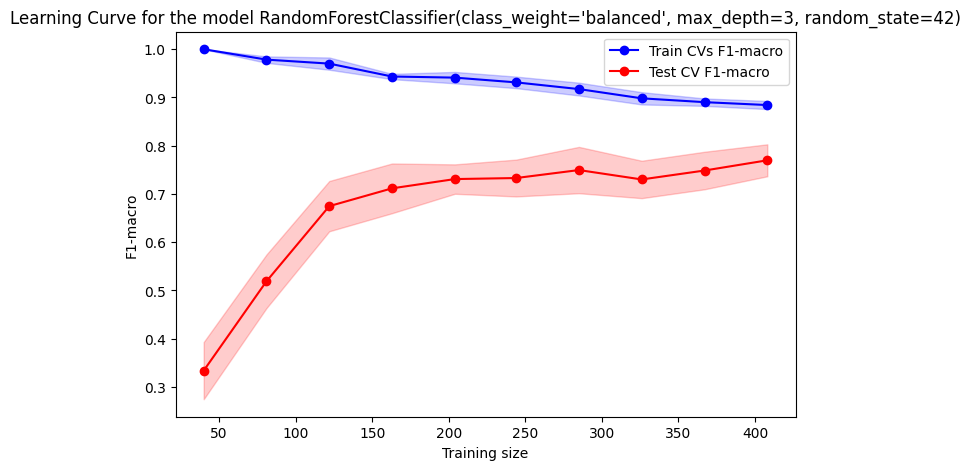

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[learning_curve] Training set sizes: [ 40  81 122 163 204 244 285 326 367 408]


C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.8s finished


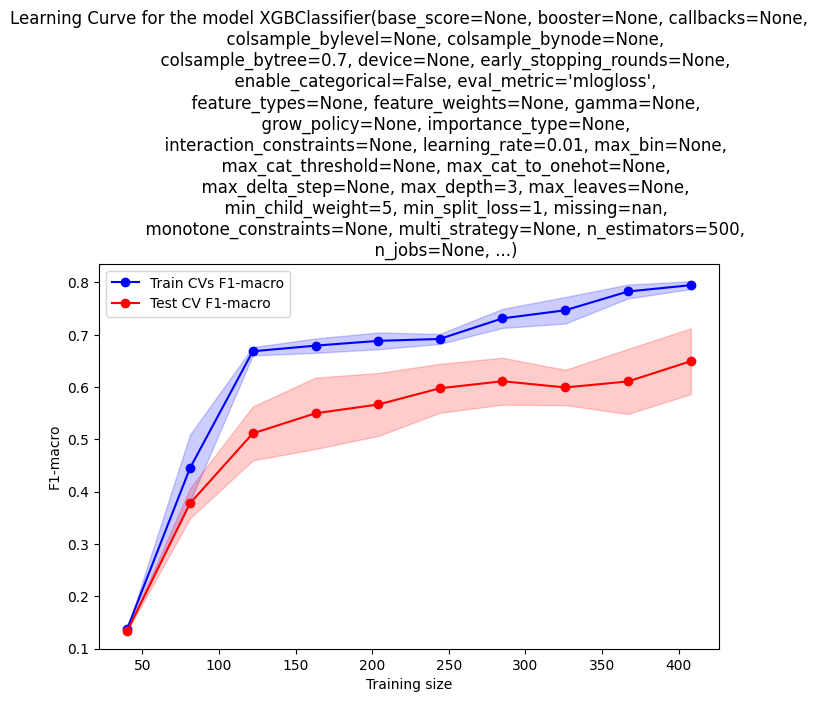

[learning_curve] Training set sizes: [ 40  81 122 163 204 244 285 326 367 408]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.4s finished


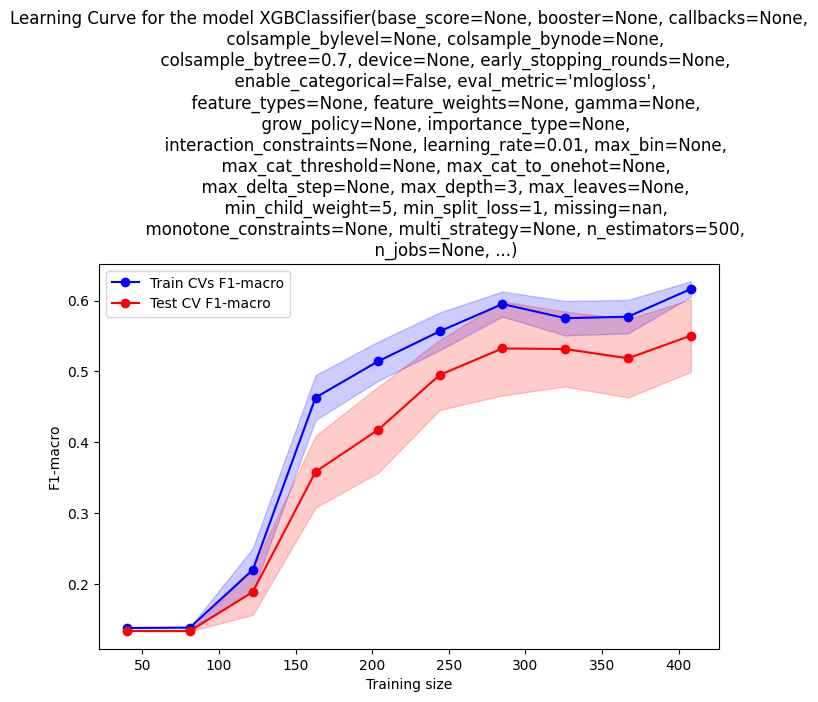

In [298]:
from sklearn.model_selection import learning_curve

def learning_curve_plot(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        cv=5, scoring='f1_macro', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), verbose=1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Train CVs F1-macro')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    plt.plot(train_sizes, test_mean, 'o-', color='red', label='Test CV F1-macro')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')
    plt.xlabel('Training size')
    plt.ylabel('F1-macro')
    plt.title(f'Learning Curve for the model {str(model)}')
    plt.legend()
    plt.show()

learning_curve_plot(model=best_rf2, X=X_val_pc, y=y_val)
learning_curve_plot(model=xgb, X=X_val_pc, y=y_val_enc)
learning_curve_plot(model=xgb_smoted, X=X_val_pc, y=y_val_enc)

`Conclusions`: 
- Learning curves show that the Random Forest Classifier after hyperparameter tuning (named best_rf2) has a clear memorization of the training set. This can be seen when training on the first fold and reaching a 100% of F1-macro with very low size of subset.
- XGB Classifiers after hyperparameter tuning and regularization show a better performance increasing the training size, predicting almost paralelly between train folds and validation folds, however, the second model (xgb_smoted) was adjusted with oversampling using a sampling strategy of of the perfect balance, reducing the noise caused by adding observations to the better represented classes and improving metrics for class 4.

### Validation curve

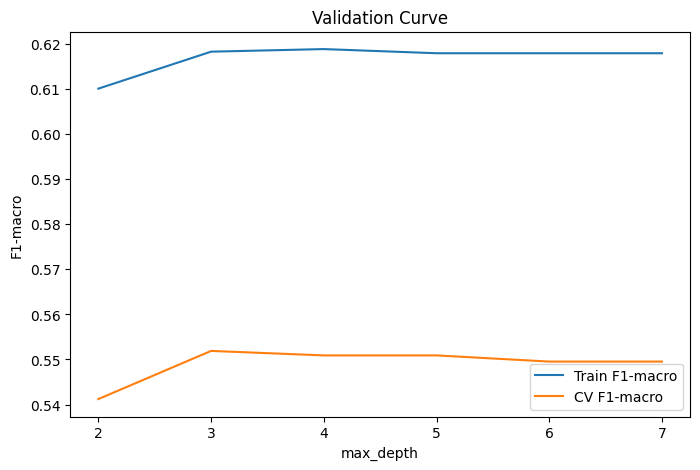

In [301]:
from sklearn.model_selection import validation_curve

param_range = [2,3,4,5,6,7]
train_scores, test_scores = validation_curve(
    xgb_smoted, X_val_pc, y_val_enc,
    param_name='max_depth', param_range=param_range,
    cv=5, scoring='f1_macro', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label='Train F1-macro')
plt.plot(param_range, test_mean, label='CV F1-macro')
plt.xlabel('max_depth')
plt.ylabel('F1-macro')
plt.title('Validation Curve')
plt.legend()
plt.show()

`Conclusion`: 
- The validation curve on one hand shows how increasing the max_depth hyperparameter, there isn't a visible improvement on F1_macro metrics, on the contrary, the metric seems to be decreasing. On the other hand, the behavior is similar for training and validation folds

### Confusion Matrix (Heatmap)

### ROC-AUC by class

C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:42:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:42:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ntama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:42:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } 

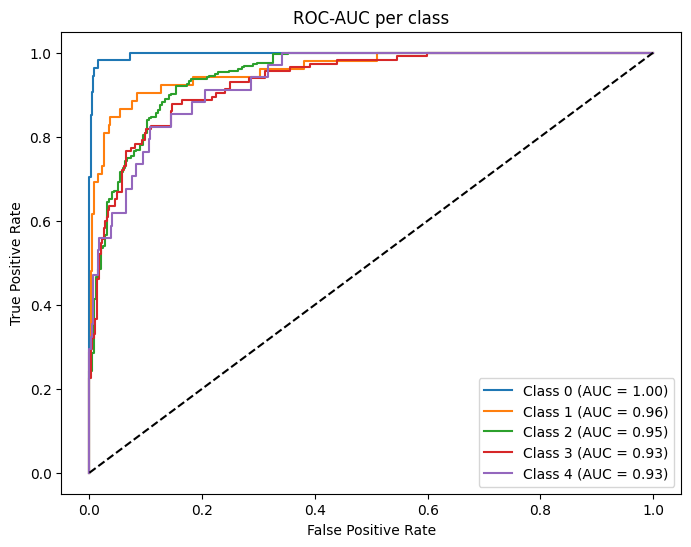

In [302]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# One-hot encoding de etiquetas
y_bin = label_binarize(y_val_enc, classes=np.unique(y_train_res))

ovr = OneVsRestClassifier(xgb_smoted)
ovr.fit(X_train_res, y_train_res)
y_score = ovr.predict_proba(X_val_pc)

plt.figure(figsize=(8,6))
for i in range(y_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC per class')
plt.legend()
plt.show()

`Conclusion`:
- Good class separability and far from the AUC = 1 line (random guessing)

### Precision - Recall Curve

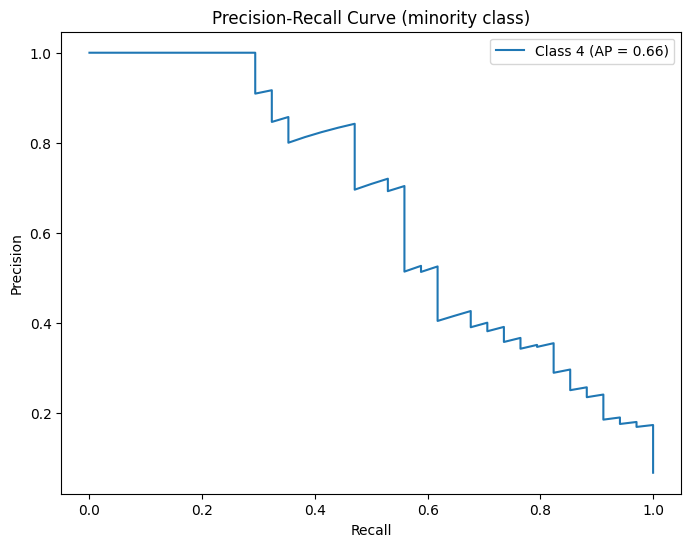

In [303]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8,6))
for i in [4]:  # clase minoritaria
    precision, recall, _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    ap = average_precision_score(y_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (minority class)')
plt.legend()
plt.show()